# Set-up

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_excel('..\..\Table_3_Dataset_Metrics.xlsx')

# remove all lines where valid is No
df = df[df['Valid'] == 'Yes']

In [3]:
# columns
df.columns

Index(['Datasets_ID', 'Collection_ID', 'Valid', 'Year', 'Collection Author',
       'Prelabeled', 'Text_Type', 'Original_Use', 'Field', 'Topic',
       'N_Records', 'N_Inclusions', 'Data_Stored'],
      dtype='object')

# Visualizations

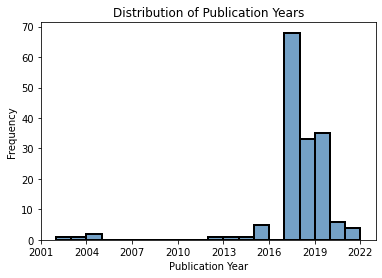

In [4]:
#bar plot of number of datasets per year
# Filter out rows with NaNs or text in the 'Year' column
filtered_df = df[df['Year'].apply(lambda x: isinstance(x, (int, float)) and not pd.isna(x))]

# Distribution of publication years
plt.figure()
min_year = int(filtered_df['Year'].min())
max_year = int(filtered_df['Year'].max())
ax = sns.histplot(data=filtered_df, x='Year', bins=range(min_year, max_year+1), kde=False, linewidth=2, color='steelblue')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.title('Distribution of Publication Years')

# Save figure
plt.savefig('Distribution of Publication Years.png', dpi=300, bbox_inches='tight')

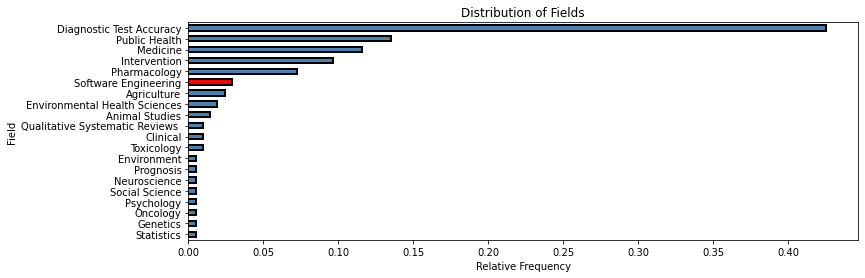

In [5]:
# make plot relative
# get total number of datasets
total = df['Field'].value_counts().sum()
# get relative frequencies
relative = df['Field'].value_counts() / total
# change N/S to Not Specified
relative = relative.rename({'N/S': 'Not Specified'})
# plot
plt.figure(figsize=(12, 4))
relative.plot(kind='barh', edgecolor='black', linewidth=2, color='steelblue')
plt.xlabel('Relative Frequency')
plt.ylabel('Field')
plt.gca().invert_yaxis()
plt.title('Distribution of Fields')
# change Not Specified bar to red
plt.gca().patches[5].set_facecolor('red')

# Save figure
plt.savefig('Distribution of Fields.png', dpi=300, bbox_inches='tight')

In [6]:
# Convert 'N_Records' and 'N_Inclusions' columns to numeric and replace non-numeric values with NaN
df['N_Records'] = pd.to_numeric(df['N_Records'], errors='coerce')
df['N_Inclusions'] = pd.to_numeric(df['N_Inclusions'], errors='coerce')

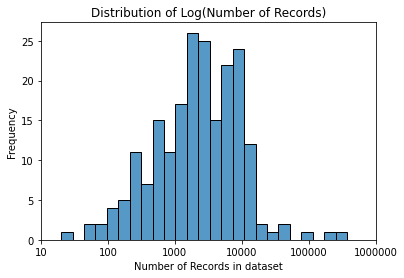

In [7]:
# barplot of number of log-transformed records
# Remove rows with NaN or zero values in 'N_Records' to avoid issues with log transformation
df = df.dropna(subset=['N_Records'])
df = df[df['N_Records'] > 0]

# Apply log transformation to 'N_Records'
df['log_N_Records'] = np.log10(df['N_Records'])

# Define a function to format tick labels as 10^x
def log10_formatter(x, pos):
    return f"10^{int(x)}"

# Histogram of log-transformed number of records with custom x-axis tick labels
plt.figure()
sns.histplot(data=df, x='log_N_Records', kde=False, bins=25)
plt.xlabel('Number of Records in dataset')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Number of Records)')

# Apply the custom tick label formatter to the x-axis
# ax = plt.gca()
# ax.xaxis.set_major_formatter(FuncFormatter(log10_formatter))

# change x ticks to 10, 100, 1000, 10000, 100000, 1000000
plt.xticks([1, 2, 3, 4, 5, 6], ['10', '100', '1000', '10000', '100000', '1000000'])

# Save figure
plt.savefig('Distribution of Log(Number of Records).png', dpi=300, bbox_inches='tight')

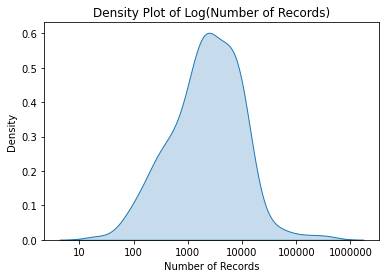

In [8]:
# Density plot of log-transformed number of records with custom x-axis tick labels
plt.figure()
sns.kdeplot(data=df, x='log_N_Records', fill=True)
plt.xlabel('Number of Records')
plt.ylabel('Density')
plt.title('Density Plot of Log(Number of Records)')

# Apply the custom tick label formatter to the x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(log10_formatter))

# change x ticks to 10, 100, 1000, 10000, 100000, 1000000
plt.xticks([1, 2, 3, 4, 5, 6], ['10', '100', '1000', '10000', '100000', '1000000'])

# Save figure
plt.savefig('Density Plot of Log(Number of Records).png', dpi=300, bbox_inches='tight')


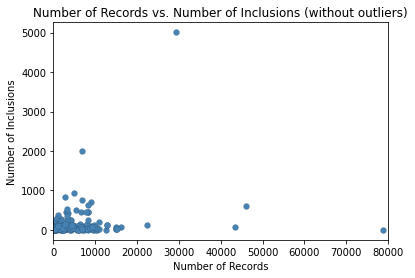

In [9]:
# Number of records and number of inclusions with outliers
plt.figure()
sns.scatterplot(data=df, x='N_Records', y='N_Inclusions', edgecolor='black', linewidth=0.1, color='steelblue')
plt.xlabel('Number of Records')
plt.ylabel('Number of Inclusions')
plt.xlim(0, 80000)
plt.title('Number of Records vs. Number of Inclusions (without outliers)')


# Save figure
plt.savefig('Number of Records vs. Number of Inclusions.png', dpi=300, bbox_inches='tight')

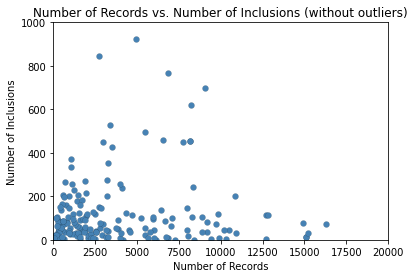

In [10]:
# Number of records and number of inclusions without outliers
plt.figure()
sns.scatterplot(data=df, x='N_Records', y='N_Inclusions', edgecolor='black', linewidth=0.1, color='steelblue')
plt.xlabel('Number of Records')
plt.ylabel('Number of Inclusions')
plt.xlim(0, 20000)
plt.ylim(0, 1000)
plt.title('Number of Records vs. Number of Inclusions (without outliers)')

# Save figure
plt.savefig('Number of Records vs. Number of Inclusions (without outliers).png', dpi=300, bbox_inches='tight')

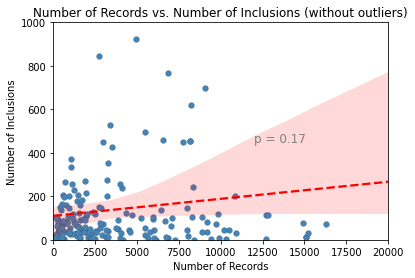

In [11]:
# Number of records and number of inclusions without outliers and with regression line
plt.figure()

# plot scatter plot
sns.scatterplot(data=df, x='N_Records', y='N_Inclusions', edgecolor='black', linewidth=0.1, color='steelblue')
# plot correlation coefficient line of best fit
sns.regplot(data=df, x='N_Records', y='N_Inclusions', scatter=False, color='red', line_kws={'linestyle':'--'})
# pplot correlation power estimate
plt.text(12000, 450, f'p = {df["N_Records"].corr(df["N_Inclusions"], method="spearman"):.2f}', fontsize=12, color='gray')

plt.xlabel('Number of Records')
plt.ylabel('Number of Inclusions')
plt.xlim(0, 20000)
plt.ylim(0, 1000)
plt.title('Number of Records vs. Number of Inclusions (without outliers)')


# Save figure
plt.savefig('Number of Records vs. Number of Inclusions with regression (without outliers).png', dpi=300, bbox_inches='tight')